# Data Analysis and Visualization of Stock Performance:
## AMZN, GOOG, T, TSLA, BA, IBM, MGM, SP500, and AAPL

#IMPORT DATASETS AND LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
!pip install plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

     |████████████████████████████████| 13.1 MB 6.1 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=2eb37c3070499e9bd69be3b4a70b605d299a1eb504487434385b2e7f267bb756
  Stored in directory: /Users/jazmiahenry/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [3]:
# List of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market Index

df = pd.read_csv('stock.csv')

In [4]:
# Sorts the stock data by date
stocks_df = df.sort_values(by = ['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [5]:
# Prints out the number of stocks
print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [6]:
# Prints the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


**What is the average return of the S&P500?**

**Which stock or index has the minimum dispertion from the mean in dollar value?**

**What is the maximum price for AMZN stock over the specified time period?** 

In [7]:
# Finds the mean of SP 500 performance
stocks_df['sp500'].mean()

2218.7495540592877

In [8]:
# Describe function shows the count of values within a column, mean, standard deviation,
# Minimum value, 25% percentile, 50% percentile, 75% percentile, and maximum value
stocks_df.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [9]:
# Finds the maximum value of a particular stock
stocks_df['AMZN'].max()

3225.0

# EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [10]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [11]:
# Shows dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [12]:
# Function for 2D plot that visualizes stock performance

def show_plot(df, fig_title, color):
  df.plot(x = 'Date', figsize = (15,8), linewidth = 3, title = fig_title, cmap = color)
  plt.grid()
  plt.show()


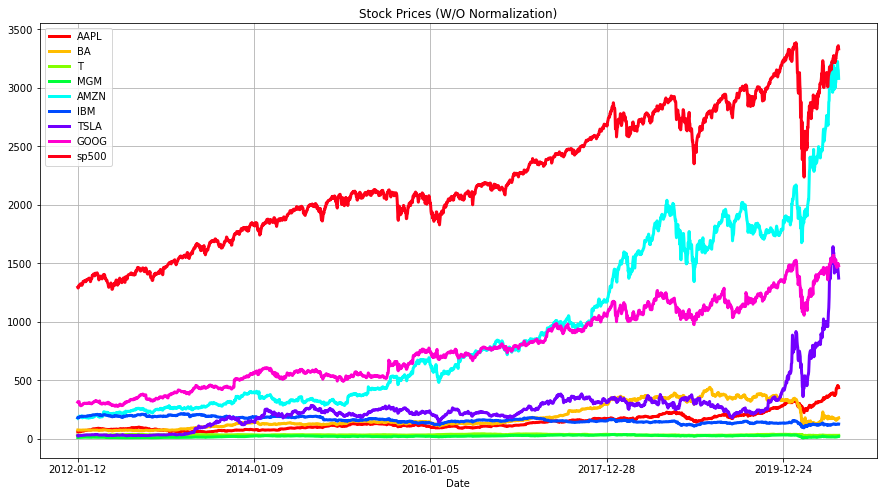

In [13]:
# Shows Plot
show_plot(stocks_df, "Stock Prices (W/O Normalization)", color = "hsv")

In [14]:
# Function to normanlize stock prices
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [15]:
# Shows normalized prizes
normalize(stocks_df)

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

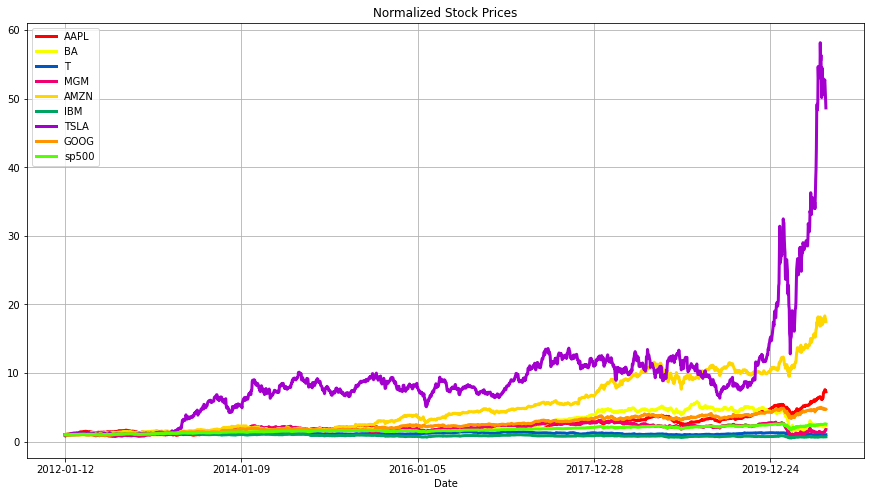

In [16]:
# Plot of normalized stock Prices
show_plot(normalize(stocks_df), "Normalized Stock Prices", color = "prism")

# INTERACTIVE DATA VISUALIZATION

In [23]:
# Function to perform an interactive data plotting using plotly express

def interactive_plot(df, title):
  fig = px.line(title = title)

  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
    
  fig.write_html("figure.html")

  fig.show()

In [24]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [25]:
# Interactive plot of normalized stock prices
interactive_plot(normalize(stocks_df), "Normalized Prices of Stocks")

# INDIVIDUAL STOCKS DAILY RETURNS

In [26]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first

sp = stocks_df['sp500']

In [27]:
# Copies sp DataFrame for daily return calculation
daily_return_df = sp.copy()

In [28]:
# For loop that iteracts over individual column to calculate daily returns
# Daily returns is calculated by subtracting current value from prior day value and dividing by prior day value. 
# For percentage, multiply output by 100
for i in range(1, len(sp)):
  daily_return_df[i] = ((sp[i] - sp[i - 1]) / sp[i - 1]) * 100

daily_return_df[0] = 0
daily_return_df

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

**Calculate the daily return for Amazon stock.**


In [29]:
amzn = stocks_df['AMZN']

amzn_daily_return_df = amzn.copy()

In [30]:
for i in range(1, len(sp)):
  amzn_daily_return_df[i] = ((amzn[i] - amzn[i - 1]) / amzn[i - 1]) * 100

amzn_daily_return_df[0] = 0
amzn_daily_return_df

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2154    2.109065
2155    0.623082
2156   -1.784187
2157   -0.609323
2158   -2.143792
Name: AMZN, Length: 2159, dtype: float64

# CALCULATING MULTIPLE STOCKS DAILY RETURNS

In [31]:
# Defines a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  #loop through every column
  for i in df.columns[1:]:

    #loop through each row
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j - 1]) / df[i][j -1]) * 100
  
      df_daily_return[i][0] = 0
  return df_daily_return

In [32]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

In [33]:
stocks_daily_return

Date      AAPL        BA         T        MGM      AMZN       IBM  \
0     2012-01-12  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1     2012-01-13 -0.374946 -1.205144 -0.166006   1.813685  1.415339 -0.769869   
2     2012-01-17  1.164812  0.857909  0.598603  -0.809717  1.815943  0.468852   
3     2012-01-18  1.038382 -0.239234  0.264463   3.918367  4.282725  0.594448   
4     2012-01-19 -0.316937  0.666134  0.296736   0.549882  2.644634 -0.303752   
...          ...       ...       ...       ...        ...       ...       ...   
2154  2020-08-05  0.362467  5.579446 -0.533156   0.000000  2.109065 -0.309917   
2155  2020-08-06  3.488923 -1.193483 -0.033501  10.406699  0.623082  0.534082   
2156  2020-08-07 -2.449458 -1.265966  0.603217   3.087768 -1.784187 -0.919762   
2157  2020-08-10  1.453480  5.522880  0.599604  13.767729 -0.609323  1.720552   
2158  2020-08-11 -2.973987  0.401316  0.000000  -0.692841 -2.143792 -0.283220   

           TSLA      GOOG     sp500  
0      0.000000  0.000000  0.000000  
1    -19.327430 -0.738516 -0.494792  
2     16.717854  0.574410  0.355295  
3      0.789470  0.688856  1.110793  
4     -0.186494  1.052283  0.493866  
...         ...       ...       ...  
2154  -0.133153  0.589774  0.642974  
2155   0.307062  1.797626  0.642770  
2156  -2.475194 -0.373974  0.063303  
2157  -2.350092  0.107728  0.274222  
2158  -3.114399 -1.054744 -0.796913  

[2159 rows x 10 columns]

**Plots the returns vs. time using both static and interactive plots**

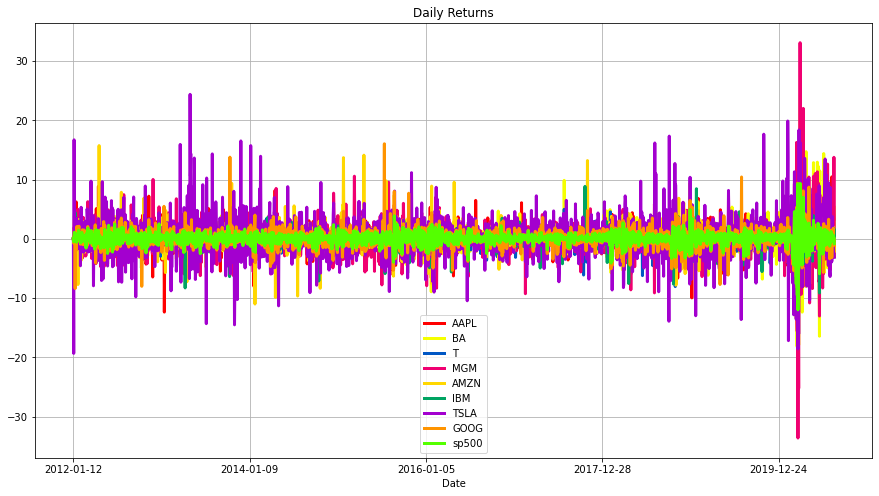

In [34]:
show_plot(stocks_daily_return, "Daily Returns", color = "prism")

In [35]:
interactive_plot(stocks_daily_return, "Daily Returns (Interactive)")

In [36]:
# Finds maximum daily return figures per stock
stocks_daily_return.max()

Date     2020-08-11
AAPL        11.9808
BA          24.3186
T           10.0223
MGM         33.1148
AMZN        15.7457
IBM         11.3011
TSLA        24.3951
GOOG        16.0524
sp500       9.38277
dtype: object

# CALCULATES THE CORRELATIONS BETWEEN DAILY RETURNS 

In [37]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

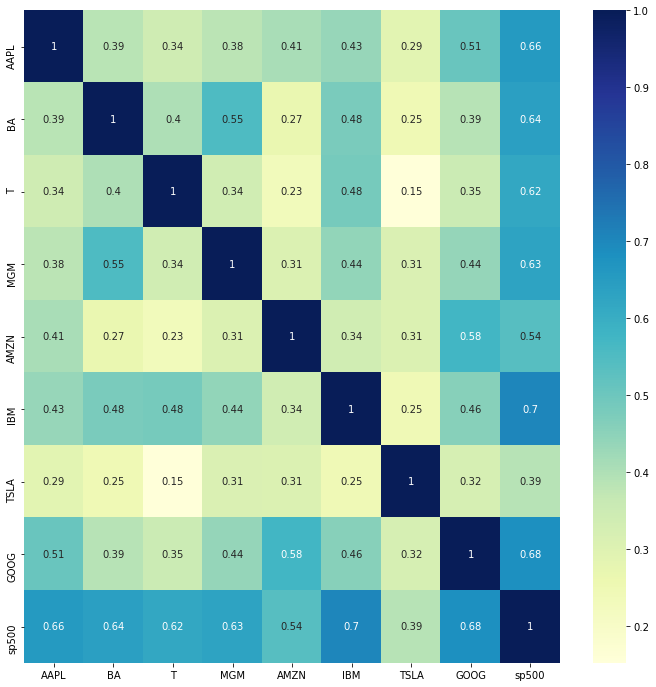

In [38]:
# Heatmap correlation plot
plt.figure(figsize = (12, 12))
sns.heatmap(cm, cmap = "YlGnBu", annot = True)

# HISTOGRAM PLOT FOR DAILY RETURNS

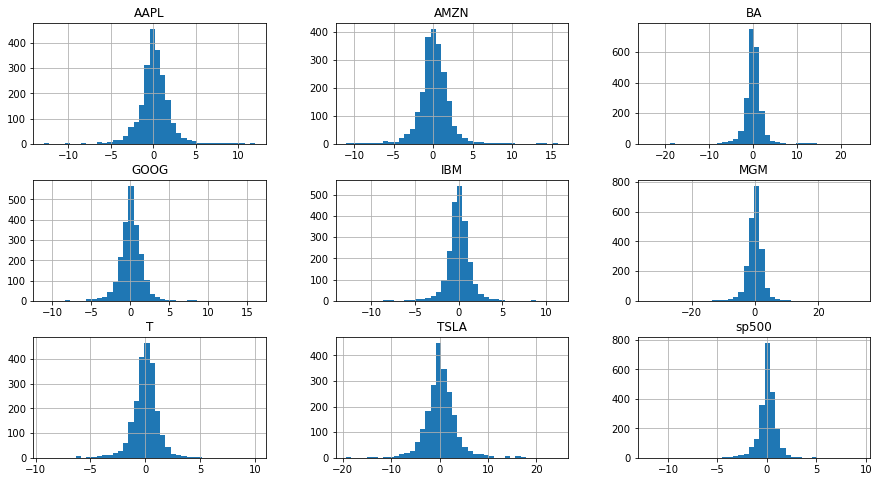

In [39]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 

stocks_daily_return.hist(figsize = (15,8), bins = 40);

In [40]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe


df_hist = stocks_daily_return.copy()

df_hist = df_hist.drop(columns = ['Date'])

data = []

for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)

data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [41]:
# Interactive Plot using Plotly's Figure Factory module

colors = ['light blue', 'green', 'red', 'yellow', 'orange', 'magenta', 'purple', 'dark blue', 'pink']
fig = ff.create_distplot(data, df_hist.columns, colors = colors)
fig.show()